In [15]:
import pandas as pd  #for manipulating data
from pandas import ExcelWriter
from pandas import ExcelFile
import sklearn  #for building models
from sklearn.model_selection import train_test_split  #for creating a hold-out sample
import sklearn.ensemble  #for building models
import numpy as np  #for manipulating data
import lime  #LIME package
import lime.lime_tabular  #the type of LIIME analysis we’ll do
import shap  #SHAP package
import matplotlib  #visualizing output (important when explaining models)
import matplotlib.pyplot as plt  #visualizing output
from mpl_toolkits.mplot3d import axes3d, Axes3D  #visualizing output 
import seaborn as sns  #visualizing output 
import plotly  #visualizing output 
import plotly.plotly as py  #visualizing output 
from plotly import tools  #visualizing output 
import time  #some of the routines take a while, so we monitor the time
import os  #needed to use Environment Variables in Domino
%matplotlib inline  

from sklearn.datasets import load_boston
boston_dataset = load_boston()


In [16]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:

boston['MEDV'] = boston_dataset.target

In [27]:

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'],boston['CRIM'],boston['ZN'],boston['INDUS'],boston['NOX'],boston['AGE'],boston['PTRATIO'],boston['TAX'],boston['B']], columns = ['LSTAT','RM','CRIM','ZN','INDUS','NOX','AGE','PTRATIO','TAX','B'])
Y = boston['MEDV']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
Explainer=shap.KernelExplainer(lin_model.predict,X_train)
shap_values=Explainer.shap_values(X_train)

Using 404 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|████████████████████████████████████████████████████████████████████████████████| 404/404 [06:37<00:00,  1.04it/s]


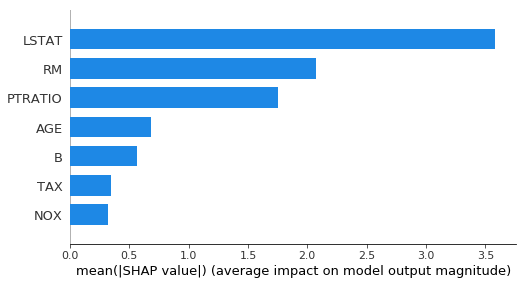

In [34]:
shap.summary_plot(shap_values,X_train, plot_type="bar", max_display=7)

In [32]:
len(Y)

506